# Demo for how to use the FCIL methods



In [1]:
# change the working directory to the root of the project
# so all the paths we use in the notebook are relative to the root of the project
# and the code is used as expected
%cd ..
!ls

/home/jeremy/code/Fed_Learning_Plus
accuracy_metrics.png  fed_env  notebooks  requirements.txt	training
dataset		      imgs     notes.md   run_glfc_cifar10.sh	utils
encoder		      model    output	  run_glfc_training.sh	weight_agg
eval		      models   README.md  scripts


/home/jeremy/code/Fed_Learning_Plus/fed_env/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Requirements

Please install the requirements first if you have not already

In [ ]:
# please run the cell to download the requirements
! pip install -r requirements.txt

## Step 1: View the script and modify the parameters if you would like to


In [25]:
# assuming we want to use the CIFAR100 dataset to quickly get started
# we will now load the one of the scripts which contains the parameters for
# the FCIL training 

# read the script
!cat scripts/run_glfc_tumor_demo.sh


#!/bin/bash

# Set environment variables if needed
export CUDA_VISIBLE_DEVICES=2

# Run training script with arguments
# model_name:     Name of the model architecture to use, for options, see model/model_factory.py (e.g., ResNet18)
# encoder_name:   Name of the encoder architecture to use, for options, see encoder/encoder_factory.py (e.g., LeNet)
# dataset_name:   Name of the dataset to use for training, for options, see datasets/dataset_factory.py (e.g., mri_tumor_17)
# img_size:       resizing dims (width and height in pixels)
# batch_size:     Number of samples per training batch
# num_clients:    Total number of federated learning clients
# num_classes:    Total number of classification categories
# device:         Computing device for training (cuda only for now)
# local_clients:  Number of clients selected per round
# memory_size:    Size of exemplar memory buffer
# epochs_local:   Number of training epochs per local client
# epochs_global:  Number of global aggregation rounds
#

As shown the above cell, the script contains the parameters for the FCIL training. It will execute *scripts/train_glfc.py* with the parameters specified in the bash(.sh) file

Feel free to modify the parameters within that script to suit your needs.


## Step 2: Run the script


Now let's run the script!
```bash
!bash scripts/run_glfc_tumor_demo.sh > glfc_tumor_demo.log
```

the output will be saved in *glfc_tumor_demo.log*


the log file contains the information of the training process, including the training loss, accuracy, etc.


You can run the above bash command in the terminal when at the root of the project directly. We are running it in the notebook for demonstration purposes.  

We will take a look at the log file and other visualizations to help us understand the training process later in this notebook.



In [26]:
# this command will print the logs of the .sh script to the .log file
! scripts/run_glfc_tumor_demo.sh > glfc_tumor_demo.log


real	8m52.827s
user	7m34.012s
sys	4m41.818s


## Step 3: Visualize the results


### Visualize Forgetting Progression Heatmap


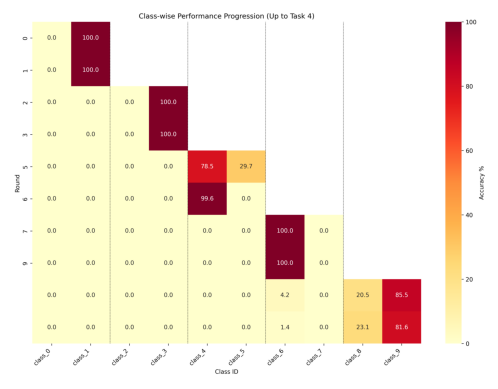

In [30]:
# the output from the .sh script which contains the 

from PIL import Image
import matplotlib.pyplot as plt

# the .sh script we ran created a directory with the following name:
#  ./output/ResNet18_LeNet_mri_tumor_17_seed42_ts2_t5_eplcl10_epglb10__iid2_m500
# within the directory, several images were created, to show the progression of the class forgetting

# the last progression heatmap shows the final performance of the model
# we will load last progression heatmap image in the folder:
#  ./output/ResNet18_LeNet_mri_tumor_17_seed42_ts2_t5_eplcl10_epglb10__iid2_m500


heatmap_path = "./output/ResNet18_LeNet_mri_tumor_17_seed42_ts2_t5_eplcl10_epglb10__iid2_m500/class_forgetting_progression_t4_r9_m500.png"

# load the image using pillow
heatmap_img = Image.open(heatmap_path)

# display the image
plt.imshow(heatmap_img)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

### Visualize Accuracy as incremental learning progresses

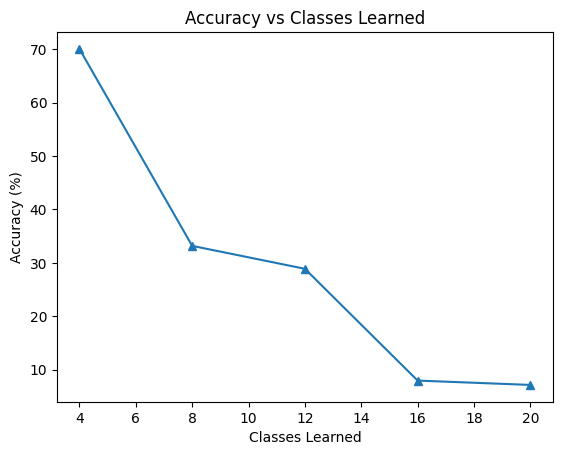

,task,round,accuracy,classes learned
1,0,1,70.05,4
3,1,3,33.18,8
5,2,5,28.89,12
7,3,7,7.96,16
9,4,9,7.15,20


In [32]:
import pandas as pd

# the .sh script we ran created a csv with the following name:
line_path = "./output/ResNet18_LeNet_mri_tumor_17_seed42_ts2_t5_eplcl10_epglb10__iid2_m500/log_tar_2.txt"

# read the txt file
with open(line_path, 'r') as file:
    content = file.read()
# print(content)

# convert 2nd row onwards to a dataframe
df = pd.read_csv(line_path, skiprows=1, header=None)

# parse the columns
# remove the strs in each column
df['task'] = df[0].str.extract(r'Task: (\d+)')[0].astype(int)
df['round'] = df[1].str.extract(r'Round: (\d+)')[0].astype(int)
df['accuracy'] = df[1].str.extract(r'(\d+\.\d+)%')[0].astype(float)

# drop the first 2 columns
df = df.iloc[:, 2:]

# get the last row of the same task no.
df = df.groupby('task').tail(1)

df['classes learned'] = range(4, 4*5+1, 4)

# plot accuracy vs classes learned
plt.plot(df['classes learned'], df['accuracy'], marker='^')
# add labels
plt.xlabel('Classes Learned')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Classes Learned')
plt.show()

df.head()

## Extra: Inspect the log file


the log file contains the information of the training process, including the training loss, accuracy, etc.

we can inspect the log file by printing the content of the file

the log file can tell us:
- which client is selected for the current round
- the training loss and accuracy of the selected client
- the global model performance after the current round of training
- etc ...



In [34]:
log_path = "glfc_tumor_demo.log"

# print the content of the file
with open(log_path, 'r') as file:
    content = file.read()
print(content)

Current working directory: /home/jeremy/code/Fed_Learning_Plus
Looking for .jpg images in: /home/jeremy/code/Fed_Learning_Plus/dataset/tumor

Scanning directories:
Checking directory: dataset/tumor/Outros Tipos de Lesões (Abscessos, Cistos, Encefalopatias Diversas) T1
Found 27 .jpg files in: dataset/tumor/Outros Tipos de Lesões (Abscessos, Cistos, Encefalopatias Diversas) T1
Checking directory: dataset/tumor/Glioma (Astrocitoma, Ganglioglioma, Glioblastoma, Oligodendroglioma, Ependimoma) T1
Found 65 .jpg files in: dataset/tumor/Glioma (Astrocitoma, Ganglioglioma, Glioblastoma, Oligodendroglioma, Ependimoma) T1
Checking directory: dataset/tumor/Neurocitoma (Central - Intraventricular, Extraventricular) T1C+
Found 76 .jpg files in: dataset/tumor/Neurocitoma (Central - Intraventricular, Extraventricular) T1C+
Checking directory: dataset/tumor/Schwannoma (Acustico, Vestibular - Trigeminal) T1C+
Found 36 .jpg files in: dataset/tumor/Schwannoma (Acustico, Vestibular - Trigeminal) T1C+
Checki